In [1]:
import cv2
import numpy as np

def compute_optical_flow(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    prev_frame=cv2.resize(prev_frame,(500,500))
    
    if not ret:
        print("Error: Unable to read the video.")
        return
    
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    
    while True:
        ret, frame = cap.read()
        frame=cv2.resize(frame,(500,500))
        if not ret:
            break
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Compute Optical Flow using Farneback method
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
        # Convert flow to RGB representation
        hsv = np.zeros_like(prev_frame)
        hsv[..., 1] = 255
        
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hsv[..., 0] = ang * 180 / np.pi / 2
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        
        flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        
        cv2.imshow('Optical Flow', flow_rgb)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        prev_gray = gray.copy()
    
    cap.release()
    cv2.destroyAllWindows()

# Example usage
#compute_optical_flow(r"C:\Users\student\Downloads\WhatsApp Video 2025-04-03 at 1.50.26 PM.mp4")

def object_tracking(video_path):
    cap = cv2.VideoCapture(video_path)
    tracker = cv2.TrackerCSRT_create()
    
    ret, frame = cap.read()
    frame=cv2.resize(frame,(500,500))
    if not ret:
        print("Error: Unable to read the video.")
        return
    
    bbox = cv2.selectROI("Select Object", frame, False)
    tracker.init(frame, bbox)
    
    while True:
        ret, frame = cap.read()
        frame=cv2.resize(frame,(500,500))
        if not ret:
            break
        
        success, bbox = tracker.update(frame)
        
        if success:
            x, y, w, h = map(int, bbox)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2, 1)
        else:
            cv2.putText(frame, "Tracking failure", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
        
        cv2.imshow('Object Tracking', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Example usage
object_tracking(r"C:\Users\student\Downloads\WhatsApp Video 2025-04-03 at 1.50.26 PM.mp4")

def object_detection(video_path):
    net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    
    cap = cv2.VideoCapture(video_path)
    while True:
        ret, frame = cap.read()
        frame=cv2.resize(frame,(500,500))
        if not ret:
            break
        
        height, width, channels = frame.shape
        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), swapRB=True, crop=False)
        net.setInput(blob)
        detections = net.forward(output_layers)
        
        for detection in detections:
            for obj in detection:
                scores = obj[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    center_x, center_y, w, h = (obj[0:4] * np.array([width, height, width, height])).astype('int')
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    cv2.putText(frame, f"Object {class_id}: {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        cv2.imshow('Object Detection', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Example usage
#object_detection(r"C:\Users\student\Downloads\WhatsApp Video 2025-04-03 at 1.50.26 PM.mp4")

def action_recognition(video_path):
    cap = cv2.VideoCapture(video_path)
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    
    while True:
        ret, frame = cap.read()
        frame=cv2.resize(frame,(500,500))
        if not ret:
            break
        
        # Detect people in the frame
        boxes, weights = hog.detectMultiScale(frame, winStride=(8, 8), padding=(8, 8), scale=1.05)
        
        for (x, y, w, h) in boxes:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, "Person Detected", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        cv2.imshow('Action Recognition', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Example usage
#action_recognition(r"D:\WhatsApp Video 2025-03-19 at 8.36.46 PM.mp4")


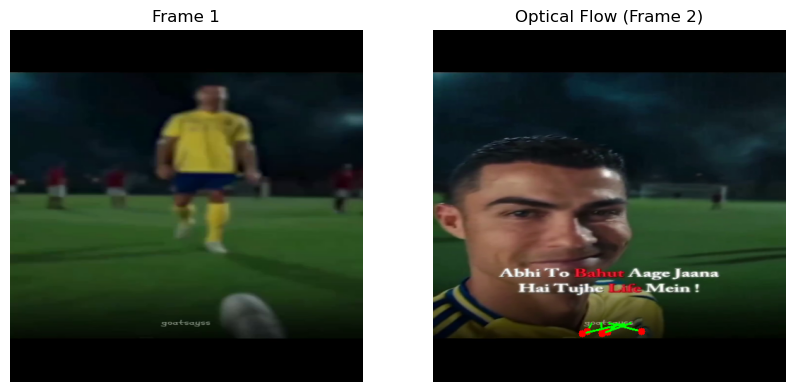

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_two_frames(video_path):
    """Extracts the first and a middle frame from the video."""
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames < 2:
        print("Error: Not enough frames in the video.")
        cap.release()
        return None, None

    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # First frame
    ret1, frame1 = cap.read()

    cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)  # Middle frame
    ret2, frame2 = cap.read()

    cap.release()
    
    if ret1 and ret2:
        return frame1, frame2
    else:
        print("Error: Unable to extract frames.")
        return None, None

def lucas_kanade_two_frames(frame1, frame2):
    """Computes and displays Lucas-Kanade optical flow between two extracted frames."""
    frame1 = cv2.resize(frame1, (500, 500))
    frame2 = cv2.resize(frame2, (500, 500))

    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Shi-Tomasi corner detection
    p0 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # Lucas-Kanade parameters
    lk_params = dict(winSize=(15, 15), maxLevel=2, 
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Compute optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

    # Draw optical flow vectors
    output = frame2.copy()
    if p1 is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        for new, old in zip(good_new, good_old):
            a, b = new.ravel()
            c, d = old.ravel()
            output = cv2.line(output, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            output = cv2.circle(output, (int(a), int(b)), 5, (0, 0, 255), -1)

    # Display frames
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
    plt.title("Frame 1")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Optical Flow (Frame 2)")
    plt.axis("off")

    plt.show()

def lucas_kanade_video(video_path):
    """Computes and displays Lucas-Kanade optical flow for the entire video."""
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    
    if not ret:
        print("Error: Unable to read the video.")
        return
    
    prev_frame = cv2.resize(prev_frame, (500, 500))
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    # Parameters
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
    lk_params = dict(winSize=(15, 15), maxLevel=2, 
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Detect good features to track
    p0 = cv2.goodFeaturesToTrack(prev_gray, mask=None, **feature_params)

    mask = np.zeros_like(prev_frame)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (500, 500))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Compute optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(prev_gray, gray, p0, None, **lk_params)

        if p1 is not None:
            good_new = p1[st == 1]
            good_old = p0[st == 1]

            for new, old in zip(good_new, good_old):
                a, b = new.ravel()
                c, d = old.ravel()
                mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
                frame = cv2.circle(frame, (int(a), int(b)), 5, (0, 0, 255), -1)

            output = cv2.add(frame, mask)
            cv2.imshow('Lucas-Kanade Optical Flow', output)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        prev_gray = gray.copy()
        p0 = good_new.reshape(-1, 1, 2)

    cap.release()
    cv2.destroyAllWindows()

# ------------------------------ USAGE ------------------------------
video_path =r"C:\Users\student\Downloads\WhatsApp Video 2025-04-03 at 1.50.26 PM.mp4"  # Replace with your video path

# Extract frames & compute optical flow for two images
frame1, frame2 = extract_two_frames(video_path)
if frame1 is not None and frame2 is not None:
    lucas_kanade_two_frames(frame1, frame2)

# Compute optical flow for full video
lucas_kanade_video(video_path)


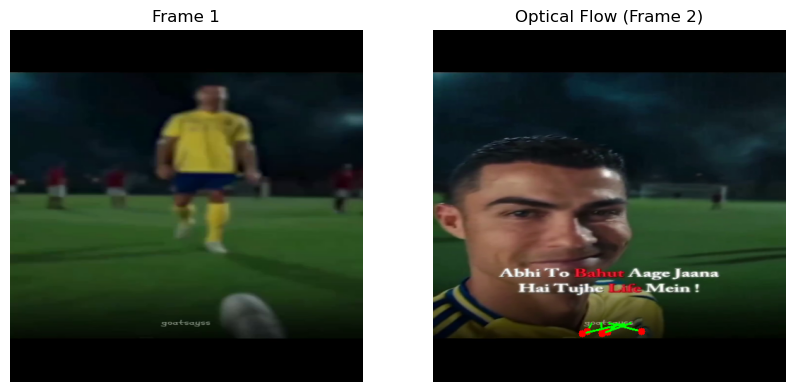

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_two_frames(video_path):
    """Extracts the first and a middle frame from the video."""
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames < 2:
        print("Error: Not enough frames in the video.")
        cap.release()
        return None, None

    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # First frame
    ret1, frame1 = cap.read()

    cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)  # Middle frame
    ret2, frame2 = cap.read()

    cap.release()
    
    if ret1 and ret2:
        return frame1, frame2
    else:
        print("Error: Unable to extract frames.")
        return None, None

def lucas_kanade_two_frames(frame1, frame2):
    """Computes and displays Lucas-Kanade optical flow between two extracted frames."""
    frame1 = cv2.resize(frame1, (500, 500))
    frame2 = cv2.resize(frame2, (500, 500))

    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Shi-Tomasi corner detection
    p0 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # Lucas-Kanade parameters
    lk_params = dict(winSize=(15, 15), maxLevel=2, 
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Compute optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

    # Draw optical flow vectors
    output = frame2.copy()
    if p1 is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        for new, old in zip(good_new, good_old):
            a, b = new.ravel()
            c, d = old.ravel()
            output = cv2.line(output, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            output = cv2.circle(output, (int(a), int(b)), 5, (0, 0, 255), -1)

    # Display frames
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
    plt.title("Frame 1")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Optical Flow (Frame 2)")
    plt.axis("off")

    plt.show()

def lucas_kanade_video(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    prev_frame=cv2.resize(prev_frame,(500,500))
    
    if not ret:
        print("Error: Unable to read the video.")
        return
    
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    
    while True:
        ret, frame = cap.read()
        frame=cv2.resize(frame,(500,500))
        if not ret:
            break
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Compute Optical Flow using Farneback method
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
        # Convert flow to RGB representation
        hsv = np.zeros_like(prev_frame)
        hsv[..., 1] = 255
        
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hsv[..., 0] = ang * 180 / np.pi / 2
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        
        flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        
        cv2.imshow('Optical Flow', flow_rgb)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        prev_gray = gray.copy()
    
    cap.release()
    cv2.destroyAllWindows()

  
# ------------------------------ USAGE ------------------------------
video_path =r"C:\Users\student\Downloads\WhatsApp Video 2025-04-03 at 1.50.26 PM.mp4"  # Replace with your video path

# Extract frames & compute optical flow for two images
frame1, frame2 = extract_two_frames(video_path)
if frame1 is not None and frame2 is not None:
    lucas_kanade_two_frames(frame1, frame2)

# Compute optical flow for full video
lucas_kanade_video(video_path)

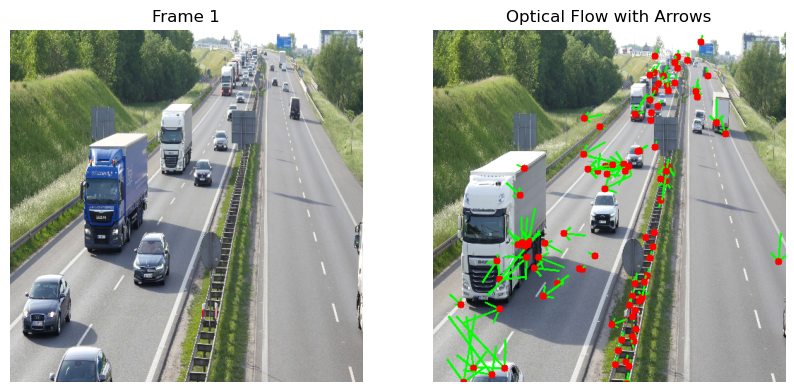

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_two_frames(video_path):
    """Extracts the first and a middle frame from the video."""
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames < 2:
        print("Error: Not enough frames in the video.")
        cap.release()
        return None, None

    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # First frame
    ret1, frame1 = cap.read()

    cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)  # Middle frame
    ret2, frame2 = cap.read()

    cap.release()
    
    if ret1 and ret2:
        return frame1, frame2
    else:
        print("Error: Unable to extract frames.")
        return None, None

def lucas_kanade_two_frames(frame1, frame2):
    """Computes and displays Lucas-Kanade optical flow between two extracted frames with arrows."""
    frame1 = cv2.resize(frame1, (500, 500))
    frame2 = cv2.resize(frame2, (500, 500))

    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Shi-Tomasi corner detection
    p0 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # Lucas-Kanade parameters
    lk_params = dict(winSize=(15, 15), maxLevel=2, 
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Compute optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

    # Draw optical flow vectors as arrows
    output = frame2.copy()
    if p1 is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        for new, old in zip(good_new, good_old):
            a, b = new.ravel()
            c, d = old.ravel()
            output = cv2.arrowedLine(output, (int(c), int(d)), (int(a), int(b)), (0, 255, 0), 2, tipLength=0.4)
            output = cv2.circle(output, (int(a), int(b)), 5, (0, 0, 255), -1)

    # Display frames
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
    plt.title("Frame 1")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Optical Flow with Arrows")
    plt.axis("off")

    plt.show()

def lucas_kanade_video(video_path):
    """Computes and displays optical flow for the entire video with arrows."""
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    prev_frame = cv2.resize(prev_frame, (500, 500))
    
    if not ret:
        print("Error: Unable to read the video.")
        return
    
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (500, 500))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Compute Optical Flow using Lucas-Kanade
        p0 = cv2.goodFeaturesToTrack(prev_gray, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
        p1, st, err = cv2.calcOpticalFlowPyrLK(prev_gray, gray, p0, None, winSize=(15, 15), maxLevel=2, 
                                               criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

        output = frame.copy()

        if p1 is not None:
            good_new = p1[st == 1]
            good_old = p0[st == 1]

            for new, old in zip(good_new, good_old):
                a, b = new.ravel()
                c, d = old.ravel()
                output = cv2.arrowedLine(output, (int(c), int(d)), (int(a), int(b)), (0, 255, 0), 2, tipLength=0.4)
                output = cv2.circle(output, (int(a), int(b)), 5, (0, 0, 255), -1)

        cv2.imshow('Optical Flow with Arrows', output)

        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

        prev_gray = gray.copy()
    
    cap.release()
    cv2.destroyAllWindows()

  
# ------------------------------ USAGE ------------------------------
video_path = r"D:\vecteezy_car-and-truck-traffic-on-the-highway-in-europe-poland_7957364.mp4"  # Replace with your video path

# Extract frames & compute optical flow for two images with arrows
frame1, frame2 = extract_two_frames(video_path)
if frame1 is not None and frame2 is not None:
    lucas_kanade_two_frames(frame1, frame2)

# Compute optical flow for full video with arrows
lucas_kanade_video(video_path)


In [ ]:
import cv2
import numpy as np

def klt_tracking_and_segmentation(video_path):
    """Performs KLT tracking and motion segmentation on a video."""
    cap = cv2.VideoCapture(video_path)
    
    # Parameters for Lucas-Kanade optical flow
    lk_params = dict(winSize=(15, 15), maxLevel=2, 
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Parameters for Shi-Tomasi corner detection
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # Background subtraction method
    bg_subtractor = cv2.createBackgroundSubtractorMOG2()

    # Read the first frame
    ret, old_frame = cap.read()
    old_frame=cv2.resize(old_frame,(500,500))
    if not ret:
        print("Error: Unable to read video.")
        return

    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

    # Create random colors for the tracking points
    color = np.random.randint(0, 255, (100, 3))

    # Create a mask for drawing motion paths
    mask = np.zeros_like(old_frame)

    while True:
        ret, frame = cap.read()
        frame=cv2.resize(frame,(500,500))
        if not ret:
            break

        # Convert frame to grayscale
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Compute optical flow using KLT algorithm
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

        # Select good points
        if p1 is not None:
            good_new = p1[st == 1]
            good_old = p0[st == 1]

            # Draw tracking lines
            for i, (new, old) in enumerate(zip(good_new, good_old)):
                a, b = new.ravel()
                c, d = old.ravel()
                mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
                frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)

            # Update previous frame and points
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1, 1, 2)

        # Perform background subtraction for segmentation
        fg_mask = bg_subtractor.apply(frame)
        segmented = cv2.bitwise_and(frame, frame, mask=fg_mask)

        # Combine original and tracking overlays
        tracking_overlay = cv2.add(frame, mask)

        # Display results
        cv2.imshow('KLT Tracking', tracking_overlay)
        cv2.imshow('Motion Segmentation', segmented)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# ------------------------------ USAGE ------------------------------
video_path = r"D:\WhatsApp Video 2025-03-27 at 8.33.09 PM.mp4"
klt_tracking_and_segmentation(video_path)
